In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import itertools


In [37]:
# Data Loading
train_data_dir = 'vegetable-dataset/train'
validation_data_dir = 'vegetable-dataset/validation'
test_data_dir = 'vegetable-dataset/test'

In [38]:
# Image size and batch size
img_width, img_height = 150, 150
batch_size = 32

In [39]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [40]:
# Preprocessing
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [41]:
# Defining the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150, 3)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(15, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [43]:
# Training
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/50
469/469 [==============================] - 69s 144ms/step - loss: 4.8452 - accuracy: 0.2827 - val_loss: 1.8993 - val_accuracy: 0.3820
Epoch 2/50
469/469 [==============================] - 74s 157ms/step - loss: 1.9113 - accuracy: 0.3914 - val_loss: 1.8069 - val_accuracy: 0.3860
Epoch 3/50
469/469 [==============================] - 76s 161ms/step - loss: 1.6973 - accuracy: 0.4457 - val_loss: 1.5428 - val_accuracy: 0.4750
Epoch 4/50
469/469 [==============================] - 75s 159ms/step - loss: 1.5509 - accuracy: 0.4880 - val_loss: 1.4782 - val_accuracy: 0.5053
Epoch 5/50
469/469 [==============================] - 81s 172ms/step - loss: 1.3834 - accuracy: 0.5465 - val_loss: 1.4323 - val_accuracy: 0.5317
Epoch 6/50
469/469 [==============================] - 82s 174ms/step - loss: 1.2551 - accuracy: 0.5883 - val_loss: 1.2605 - val_accuracy: 0.5783
Epoch 7/50
469/469 [==============================] - 76s 162ms/step - loss: 1.1546 - accuracy: 0.6157 - val_loss: 1.0550 - val_ac

In [44]:
# Test Accuracy
score = model.evaluate(test_generator, steps=len(test_generator))
print("Test accuracy: {:.2f}%".format(score[1] * 100))


3000/3000 [==============================] - 45s 15ms/step - loss: 0.4281 - accuracy: 0.8920
Test accuracy: 89.20%


3000/3000 [==============================] - 47s 15ms/step


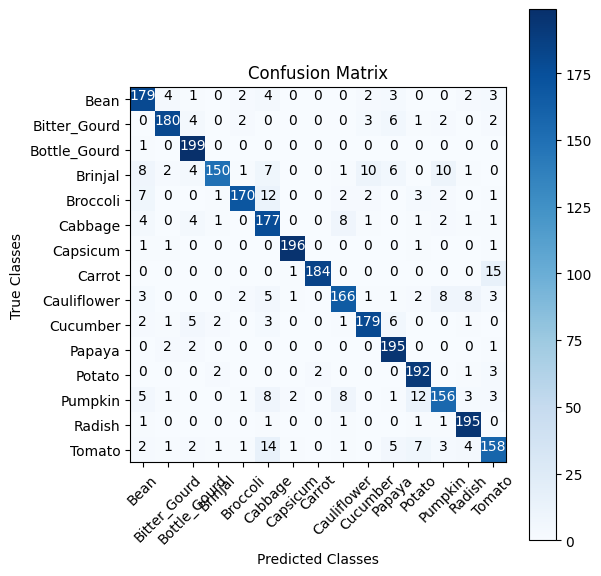

In [90]:
# Confusion Matrix
true_classes = test_generator.classes
predict_test = model.predict(test_generator)
predicted_classes = np.argmax(predict_test, axis=1)

cm = confusion_matrix(true_classes, predicted_classes)

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Classes')
    plt.xlabel('Predicted Classes')

class_names = list(test_generator.class_indices.keys())

plot_confusion_matrix(cm, class_names)
plt.show()

In [49]:
# model.save('final_project_model.keras')
# model = tf.keras.models.load_model('final_project_model.keras')
# model.summary()

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

Accuracy: 0.892


In [92]:
from sklearn.metrics import classification_report
class_report = classification_report(true_classes, predicted_classes, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        Bean       0.84      0.90      0.87       200
Bitter_Gourd       0.94      0.90      0.92       200
Bottle_Gourd       0.90      0.99      0.95       200
     Brinjal       0.96      0.75      0.84       200
    Broccoli       0.95      0.85      0.90       200
     Cabbage       0.77      0.89      0.82       200
    Capsicum       0.98      0.98      0.98       200
      Carrot       0.99      0.92      0.95       200
 Cauliflower       0.88      0.83      0.86       200
    Cucumber       0.90      0.90      0.90       200
      Papaya       0.87      0.97      0.92       200
      Potato       0.87      0.96      0.91       200
     Pumpkin       0.85      0.78      0.81       200
      Radish       0.90      0.97      0.94       200
      Tomato       0.83      0.79      0.81       200

    accuracy                           0.89      3000
   macro avg       0.90      0.89      0.89      3000
wei

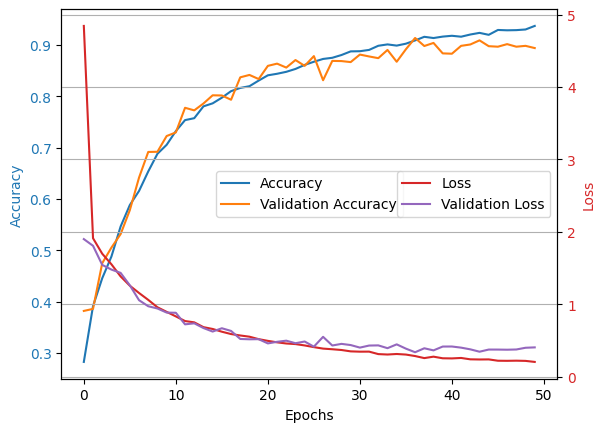

In [89]:

df = pd.DataFrame(history.history)
fig, ax1 = plt.subplots()

ax1.plot(df.index, df['accuracy'], label='Accuracy', color='tab:blue')
ax1.plot(df.index, df['val_accuracy'], label='Validation Accuracy', color='tab:orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='center')

ax2 = ax1.twinx()
ax2.plot(df.index, df['loss'], label='Loss', color='tab:red')
ax2.plot(df.index, df['val_loss'], label='Validation Loss', color='tab:purple')
ax2.set_ylabel('Loss', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='center right')

plt.grid(True)
plt.show()
